### Computação Quântica com Qiskit

##### Jonas Maziero

<table>
<td> Universidade Federal de Santa Maria <br>
Centro de Ciências Naturais e Exatas <br>
Departamento de Física <br>
https://sites.google.com/site/jonasmaziero <br>
jonas.maziero@ufsm.br 
    </td>
    <td><img src='ufsm.jpg' width='250'></td>
    <td><img src='inpe_ufsm.jpg' width='550'></td>
</table>
<table>
    <td>Suporte Financeiro:</td>
    <td><img src='cnpq.png' width='200'></td>
    <td><img src='inct-iq.png' width='330'></td>
    <td><img src='capes.png' width='100'></td>
    <td><img src='fapergs.png' width='150'></td>
    <td><img src='ufsm.jpg' width='75'></td>
    </table>

## Aula 4

- Medidas na base de Bell
- Teletransporte quântico
- Codificação superdensa

# Medida na base de Bell

Base computacional: $$\{|jk\rangle\}_{j,k=0}^{1}= \{|00\rangle,|01\rangle,|10\rangle,|11\rangle\}.$$

Base de Bell:
\begin{align}
& |\Phi_+\rangle = (|00\rangle + |11\rangle)/\sqrt{2} = U|00\rangle = |B_{00}\rangle, \\
& |\Phi_-\rangle = (|00\rangle - |11\rangle)/\sqrt{2} = U|10\rangle = |B_{10}\rangle, \\
& |\Psi_+\rangle = (|01\rangle + |10\rangle)/\sqrt{2} = U|01\rangle = |B_{01}\rangle, \\
& |\Psi_-\rangle = (|01\rangle - |10\rangle)/\sqrt{2} = U|11\rangle = |B_{11}\rangle.
\end{align}
Relação entre as bases:
$$|B_{jk}\rangle = U|jk\rangle,\ \text{com } j,k=0,1 \text{ e } U = C_X^{A\rightarrow B}(H\otimes I).$$ 

Se queremos fazer medidas na base de Bell $\{|B_{jk}\rangle\}$ para a preparação $|\Psi\rangle$, obteremos a mesma estatística se fizermos medidas na base computacional $\{|jk\rangle\}_{j,k=0}^1$ para a preparação
$$|\Psi'\rangle = U^\dagger|\Psi\rangle = (H\otimes I)C_X^{A\rightarrow B}|\Psi\rangle.$$

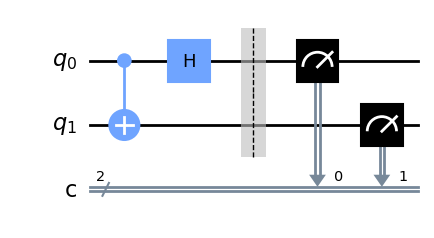

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2)
qc.cx(0,1); qc.h(0)
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw('mpl')

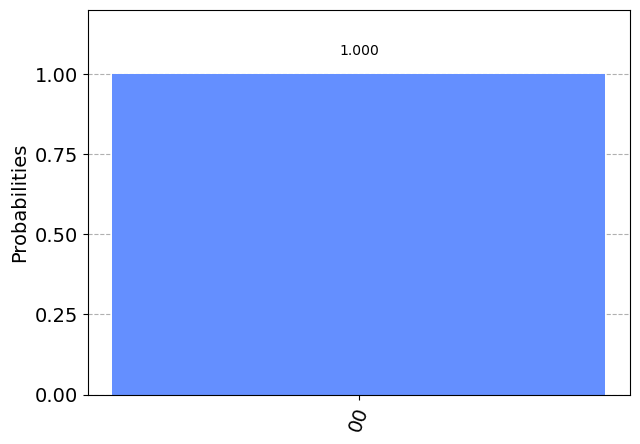

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
nshots = 2**13
qc = QuantumCircuit(2,2)
qc.h(0); qc.cx(0,1) # prepara |Phi+>
qc.cx(0,1); qc.h(0); qc.measure([0,1],[0,1]) # mede na BB
job = execute(qc, backend=simulator, shots=nshots)
plot_histogram(job.result().get_counts())

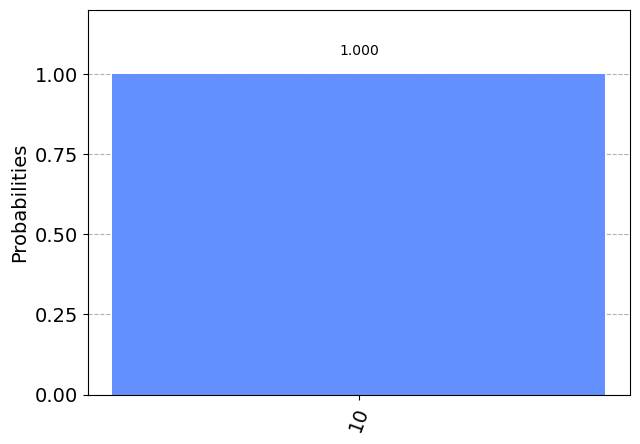

In [3]:
qc = QuantumCircuit(2,2)
qc.x(1); qc.h(0); qc.cx(0,1) # prepara |Psi+>
qc.cx(0,1); qc.h(0); qc.measure([0,1],[0,1]) # mede na BB
job = execute(qc, backend=simulator, shots=nshots)
plot_histogram(job.result().get_counts())

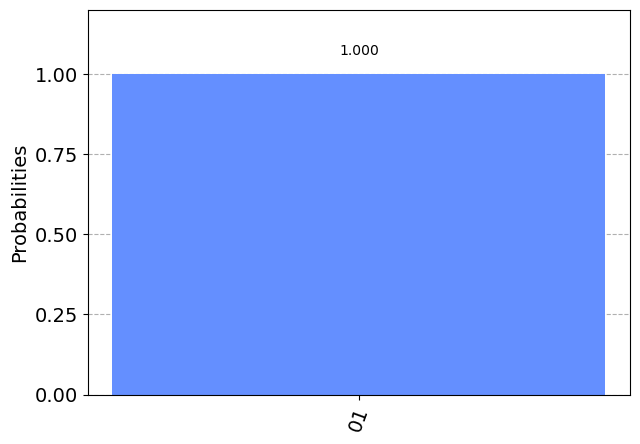

In [4]:
qc = QuantumCircuit(2,2)
qc.x(0); qc.h(0); qc.cx(0,1) # prepara |Phi->
qc.cx(0,1); qc.h(0); qc.measure([0,1],[0,1]) # mede na BB
job = execute(qc, backend=simulator, shots=nshots)
plot_histogram(job.result().get_counts())

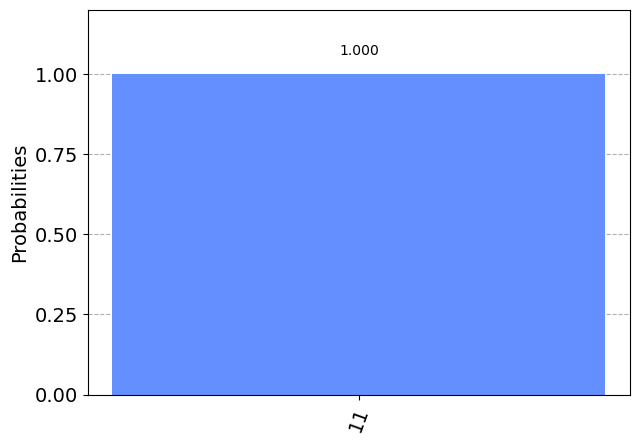

In [5]:
qc = QuantumCircuit(2,2)
qc.x([0,1]); qc.h(0); qc.cx(0,1) # prepara |Psi->
qc.cx(0,1); qc.h(0); qc.measure([0,1],[0,1]) # mede na BB
job = execute(qc, backend=simulator, shots=nshots)
plot_histogram(job.result().get_counts())

# Teletransporte quântico

## Protocolo

<table>
    <td><img src='teleportation.png' width='600'></td>
    <td>\begin{align}
        & |00\rangle = (|\Phi_{+}\rangle + |\Phi_{-}\rangle)/\sqrt{2}, \\
        & |11\rangle = (|\Phi_{+}\rangle - |\Phi_{-}\rangle)/\sqrt{2}, \\
        & |01\rangle = (|\Psi_{+}\rangle + |\Psi_{-}\rangle)/\sqrt{2}, \\
        & |10\rangle = (|\Psi_{+}\rangle - |\Psi_{-}\rangle)/\sqrt{2}.
\end{align}</td>
    </table>
\begin{align}
|\Psi\rangle_{AA'B} & = |\psi\rangle_A |\Phi_+\rangle_{A'B} =(c_0|0\rangle_A+c_1|1\rangle_A)(|00\rangle_{A'B}+|11\rangle_{A'B})/\sqrt{2} \\
& = \frac{1}{2}\Big(|\Phi_{+}\rangle_{AA'}\big(c_{0}|0\rangle_{B}+c_{1}|1\rangle_{B}\big) + |\Phi_{-}\rangle_{AA'}\big(c_{0}|0\rangle_{B}-c_{1}|1\rangle_{B}\big) \\
& \hspace{1.3cm}  + |\Psi_{+}\rangle_{AA'}\big(c_{0}|1\rangle_{B}+c_{1}|0\rangle_{B}\big) + |\Psi_{-}\rangle_{AA'}\big(c_{0}|1\rangle_{B}-c_{1}|0\rangle_{B}\big)\Big)
\end{align}

\begin{align}
& \text{Alice obtém } |\Phi_+\rangle \ \xrightarrow{00}\ \text{Bob aplica } I\ \therefore\ I(c_{0}|0\rangle_{B}+c_{1}|1\rangle_{B}) = |\psi\rangle_B, \\
& \text{Alice obtém } |\Phi_-\rangle \ \xrightarrow{10}\ \text{Bob aplica } Z\ \therefore\ Z(c_{0}|0\rangle_{B}-c_{1}|1\rangle_{B}) = |\psi\rangle_B, \\
& \text{Alice obtém } |\Psi_+\rangle \ \xrightarrow{01}\ \text{Bob aplica } X\ \therefore\ X(c_{0}|1\rangle_{B}+c_{1}|0\rangle_{B}) = |\psi\rangle_B, \\
& \text{Alice obtém } |\Psi_-\rangle  \ \xrightarrow{11}\ \text{Bob aplica } ZX\ \therefore\ ZX(c_{0}|1\rangle_{B}-c_{1}|0\rangle_{B}) = |\psi\rangle_B.
\end{align}

<table>
    <td><img src='teleportacao_circuito.png' width='700'></td>
    </table>

__Problema__: Considere o protocolo de teletransporte quântico. Refaça as contas determinando as respectivas transformações unitárias que Bob precisa aplicar para obter o estado $|\psi\rangle_B$ quando o estado emaranhado compartilhado é $|\Psi_-\rangle_{A'B}$.

## Estado a ser teletransportado:
\begin{align}
|\psi\rangle & = |c_0|e^{i\phi_0}|0\rangle + |c_1|e^{i\phi_1}|1\rangle = e^{i(\pi+\lambda)}\sin(\theta/2)|0\rangle + e^{i(\phi+\lambda)}\cos(\theta/2)|1\rangle.
\end{align}
Pode ser preparado usando a porta geral de um qubit:
$$U(\theta,\phi,\lambda) = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}.$$
Ou seja $U|1\rangle = |\psi\rangle.$

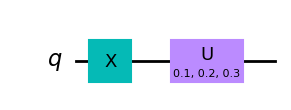

In [3]:
def qc_psi(th,ph,lb): # prepara o estado a ser teletransportado
    from qiskit import QuantumCircuit
    qc = QuantumCircuit(1, name=r'$|\psi\rangle$'); qc.x(0); qc.u(th,ph,lb, 0)
    return qc
qc_psi_ = qc_psi(0.1,0.2,0.3); qc_psi_.draw('mpl')

### Obtenção dos ângulos - Cálculos analíticos
$$|\psi\rangle = \begin{bmatrix} c_0 & c_1\end{bmatrix}^T = c_0|0\rangle+c_1|1\rangle = |c_0|e^{i\phi_0}|0\rangle+|c_1|e^{i\phi_1}|1\rangle.$$
Temos que $$|c_j|=\sqrt{c_j c_j^*} = \sqrt{\Re(c_j)^2+\Im(c_j)^2}$$ para $j=0,1$. Ademais $c_j = \Re(c_j)+i\Im(c_j) = |c_j|\cos(\phi_j) + i|c_j|\sin(\phi_j)$. Então $$\phi_j = \arccos(\Re(c_j)/|c_j|) =  \arcsin(\Im(c_j)/|c_j|)  = \arctan(\Im(c_j)/\Re(c_j)).$$
Usando 
$|\psi\rangle = e^{i(\pi+\lambda)}\sin(\theta/2)|0\rangle + e^{i(\phi+\lambda)}\cos(\theta/2)|1\rangle$
teremos que $$e^{i(\pi+\lambda)}\sin(\theta/2)=|c_0|e^{i\phi_0}\ \therefore\ \lambda = \phi_0-\pi$$ 
e 
$$e^{i(\phi+\lambda)}\cos(\theta/2) = |c_1|e^{i\phi_1}\ \therefore\ \phi=\phi_1-\lambda$$
e 
$$\theta = 2\arccos(|c_1|) = 2\arcsin(|c_0|).$$ 

## Estados aleatórios no Qiskit

A função abaixo retorna um vetor de estado com uma certa dimensão com distribuição uniforme (de Haar) no espaço de Hilbert.

In [7]:
from qiskit.quantum_info import random_statevector
for j in range(0,6):
    psi = random_statevector(2)
    print(psi)

Statevector([-0.23438472+0.04631588j,  0.91265017-0.33164486j],
            dims=(2,))
Statevector([ 0.65780555-0.71637687j, -0.06676335+0.22279743j],
            dims=(2,))
Statevector([-0.54903533-0.6838703j ,  0.40964341-0.25114516j],
            dims=(2,))
Statevector([ 0.07132636+0.18351146j, -0.97704407+0.08136946j],
            dims=(2,))
Statevector([-0.52162825+0.41221023j,  0.24779226-0.70468837j],
            dims=(2,))
Statevector([0.47377204-0.69059256j, 0.52318384-0.15779936j],
            dims=(2,))


### Obtendo os ângulos - Código Python

In [4]:
def angulos(psi): # psi = [c0,c1]
    c0_abs = math.sqrt(psi[0].real**2 + psi[0].imag**2); c1_abs = math.sqrt(psi[1].real**2 + psi[1].imag**2)
    ph0 = math.acos(psi[0].real/c0_abs); ph1 = math.acos(psi[1].real/c1_abs)
    th = 2*math.acos(c1_abs); lb = ph0 - math.pi; ph = ph1 - lb    
    return th, ph, lb

In [11]:
import math; import numpy as np
for j in range(0,2):
    psi = random_statevector(2); print(psi)
    th, ph, lb = angulos(psi)
    psin = np.array([(math.cos(math.pi+lb)+1j*math.sin(math.pi+lb))*math.sin(th/2), 
                     (math.cos(ph+lb)+1j*math.sin(ph+lb))*math.cos(th/2)])
    print(psin)

Statevector([0.64326055-0.69368817j, 0.07673649+0.3148398j ],
            dims=(2,))
[0.64326055+0.69368817j 0.07673649+0.3148398j ]
Statevector([-0.65547659+0.75435317j, -0.03560767+0.00581555j],
            dims=(2,))
[-0.65547659+0.75435317j -0.03560767+0.00581555j]


### Circuito quântico para o teletransporte

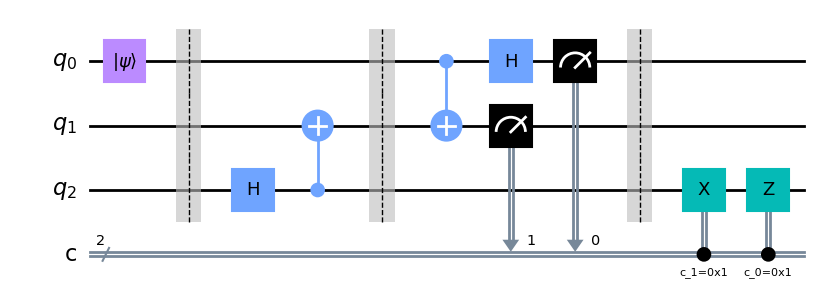

In [12]:
from qiskit import *
def qc_teleport(th,ph,lb):
    qc = QuantumCircuit(3,2, name='tel')
    qc_psi_ = qc_psi(th,ph,lb); qc.append(qc_psi_, [0]); qc.barrier()
    qc.h(2); qc.cx(2,1); qc.barrier()
    qc.cx(0,1); qc.h(0); qc.measure([0,1],[0,1]); qc.barrier()
    qc.x(2).c_if(1, 1); qc.z(2).c_if(0, 1) # oprações condicionadas em info clássica
    return qc
qc_teleport_ = qc_teleport(0.1,0.2,0.3); qc_teleport_.draw('mpl')

## Fidelidade quântica

Mede o quão simular são 2 estados quânticos
\begin{align}
& F(|\psi\rangle,|\phi\rangle) = |\langle\psi|\phi\rangle|^2, \\
& F(|\psi\rangle,\rho) = \langle\psi|\rho|\psi\rangle,\\
& F(\rho,\sigma) = Tr(\sqrt{\rho}\sigma\sqrt{\rho}) = Tr(\sqrt{\rho\sigma}).
\end{align}

#### Teste - estado particular: $|\psi\rangle = |+\rangle = (|0\rangle+|1\rangle)/\sqrt{2}$.

#### Simulação

In [14]:
import qiskit; import math; import numpy as np
from qiskit import Aer, QuantumCircuit, execute
from qiskit.quantum_info import state_fidelity
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
simulator = Aer.get_backend('qasm_simulator')
nshots = 2**13
qc = QuantumCircuit(3)
psi = np.array([1/math.sqrt(2),1/math.sqrt(2)]); th,ph,lb=angulos(psi)
qc_teleport_ = qc_teleport(th,ph,lb); qc.append(qc_teleport_, [0,1,2])
qstc = state_tomography_circuits(qc_teleport_, [2])
job = qiskit.execute(qstc, backend = simulator, shots = nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho_sim = qstf.fit(method='lstsq')
F = state_fidelity(rho_sim, psi)
print('rho_sim =',rho_sim); print('F = ', F)

rho_sim = [[0.49841311+0.j        0.4999921 +0.0023193j]
 [0.4999921 -0.0023193j 0.50158689+0.j       ]]
F =  0.9999921025716791


#### Experimento

In [120]:
import qiskit
qiskit.IBMQ.save_account('7ec48a29167ab443c525564bd84b033895cf87b6c6da8d263be59ad00a2d9e70718cf1398362403ace62320d0044793f08dbaa2629bfde7f6ec339f90fe74e7b', 
                  overwrite = True)
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibm_nairobi')
qc = QuantumCircuit(3)
psi = np.array([1/math.sqrt(2),1/math.sqrt(2)]); th,ph,lb=angulos(psi)
qc_teleport_ = qc_teleport(th,ph,lb); qc.append(qc_teleport_, [0,1,2])
qstc = state_tomography_circuits(qc_teleport_, [2])
job = execute(qstc, backend = device, shots = nshots)
jobid = job.job_id(); print(jobid)

ibmqfactory.load_account:WARNING:2023-10-07 17:36:40,855: Credentials are already in use. The existing account in the session will be replaced.


cmgw2t3dyqh0008rssp0


Não foi possível fazer o experimento pois o Qsikit não suporta fazer medidas no meio do circuito em experimentos. <br>
Só podemos fazer medidas no final. <br>
Mensagem de erro:
<img src='erro_mid_circuit_measure.png' width='900'>

### Implementação coerente do teletransporte quântico
Ctrl-Z: $C_Z^{A\rightarrow B} = C_Z^{B\rightarrow A} = |0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes Z.$

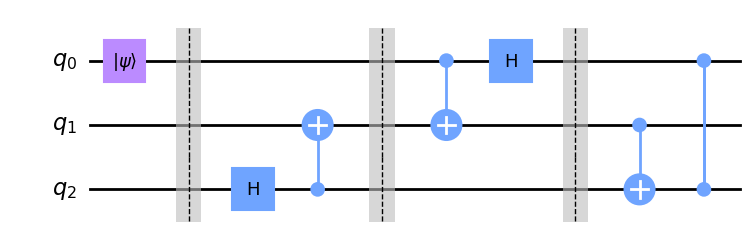

In [22]:
def qc_teleport_coe(th,ph,lb):
    qc = QuantumCircuit(3, name='tel'); qc_psi_ = qc_psi(th,ph,lb); qc.append(qc_psi_, [0]); qc.barrier()
    qc.h(2); qc.cx(2,1); qc.barrier(); qc.cx(0,1); qc.h(0); qc.barrier()
    qc.cx(1,2); qc.cz(0,2) # oprações quânticas controladas
    return qc
qc_teleport_coe_ = qc_teleport_coe(0.1,0.2,0.3); qc_teleport_coe_.draw('mpl')

#### Teste - estado particular: $|\psi\rangle = |\oplus\rangle = (|0\rangle+i|1\rangle)/\sqrt{2}$.
##### Simulação

In [16]:
import qiskit; import math; import numpy as np
from qiskit import Aer, QuantumCircuit, execute
from qiskit.quantum_info import state_fidelity
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
simulator = Aer.get_backend('qasm_simulator'); nshots = 2**13; qc = QuantumCircuit(3)
psi = np.array([1/math.sqrt(2),(1/math.sqrt(2))*1j]); th,ph,lb=angulos(psi)
qc_teleport_coe_ = qc_teleport_coe(th,ph,lb); qc.append(qc_teleport_coe_, [0,1,2])
qstc = state_tomography_circuits(qc_teleport_coe_, [2])
job = qiskit.execute(qstc, backend = simulator, shots = nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho_sim = qstf.fit(method='lstsq')
F = state_fidelity(rho_sim, psi)
print('rho_sim =',rho_sim); print('F = ', F)

rho_sim = [[ 4.94263075e-01+0.j         -3.66186733e-04-0.49996695j]
 [-3.66186733e-04+0.49996695j  5.05736925e-01+0.j        ]]
F =  0.9999669525011723


##### Experimento

In [17]:
import qiskit
qiskit.IBMQ.save_account('7ec48a29167ab443c525564bd84b033895cf87b6c6da8d263be59ad00a2d9e70718cf1398362403ace62320d0044793f08dbaa2629bfde7f6ec339f90fe74e7b', 
                  overwrite = True); qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibm_nairobi'); qc = QuantumCircuit(3)
psi = np.array([1/math.sqrt(2),(1/math.sqrt(2))*1j]); th,ph,lb=angulos(psi)
qc_teleport_coe_ = qc_teleport_coe(th,ph,lb); qc.append(qc_teleport_coe_, [0,1,2])
qstc = state_tomography_circuits(qc_teleport_coe_, [2])
job = execute(qstc, backend = device, shots = nshots); jobid = job.job_id(); print(jobid)

cmgxyy31db9g008cx0wg


In [22]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibm_nairobi')
job = device.retrieve_job('cmgxyy31db9g008cx0wg')
qstf = StateTomographyFitter(job.result(), qstc); rho_exp = qstf.fit(method='lstsq')
psi = np.array([1/math.sqrt(2),(1/math.sqrt(2))*1j])
F = state_fidelity(psi, rho_exp); print('rho_exp = ',rho_exp,', F = ', F)

rho_exp =  [[ 0.48193359+0.j         -0.05004883-0.41540527j]
 [-0.05004883+0.41540527j  0.51806641+0.j        ]] , F =  0.9154052734374991


### Testes para estados aleatórios

#### Simulação

In [32]:
import qiskit; import math; import numpy as np
from qiskit import Aer, QuantumCircuit, execute
from qiskit.quantum_info import state_fidelity
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import random_statevector
simulator = Aer.get_backend('qasm_simulator'); nshots = 2**13
list_psi = []
#for j in range(0,5):
qc = QuantumCircuit(3)
psi = random_statevector(2); 
print(psi); th,ph,lb=angulos(psi); list_psi.append(psi)
qc_teleport_coe_ = qc_teleport_coe(th,ph,lb); qc.append(qc_teleport_coe_, [0,1,2])
qstc = state_tomography_circuits(qc, [2])
job = execute(qstc, backend=simulator, shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq'); print(rho)
F = state_fidelity(psi,rho); print(F)

Statevector([0.70270152+0.33942171j, 0.48278881+0.39738953j],
            dims=(2,))
[[0.60839844+0.j         0.47277832-0.11315918j]
 [0.47277832+0.11315918j 0.39160156+0.j        ]]
0.9980674322935578


#### Experimento

In [128]:
import qiskit
qiskit.IBMQ.save_account('7ec48a29167ab443c525564bd84b033895cf87b6c6da8d263be59ad00a2d9e70718cf1398362403ace62320d0044793f08dbaa2629bfde7f6ec339f90fe74e7b', 
                  overwrite = True)
qiskit.IBMQ.load_account()
#provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = qiskit.IBMQ.get_provider(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')
device = provider.get_backend('ibm_nairobi')

ibmqfactory.load_account:WARNING:2023-10-07 18:41:37,030: Credentials are already in use. The existing account in the session will be replaced.


In [127]:
jobs_ids = []; list_psi = []
for j in range(0,5):
    qc = QuantumCircuit(3)
    psi = random_statevector(2); th,ph,lb=angulos(psi); list_psi.append(psi)
    qc_teleport_coe_ = qc_teleport_coe(th,ph,lb); qc.append(qc_teleport_coe_, [0,1,2])
    qstc = state_tomography_circuits(qc_teleport_coe_, [2])
    job = execute(qstc, backend = device, shots = nshots)
    jobid = job.job_id(); print(jobid); jobs_ids.append(jobid)
f = open("jobs_ids_tel.txt", "w"); f.write(str(jobs_ids)); f.close()

Statevector([0.41650786-0.8752847j , 0.03977624+0.24251957j],
            dims=(2,))


In [ ]:
f = open("jobs_ids_tel.txt","r")
list_ids = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()
for j in range(0,5):
    job = device.retrieve_job(list_ids[j])
    qstf = StateTomographyFitter(job.result(), qstc); rho_exp = qstf.fit(method='lstsq')
    F = state_fidelity(psi, rho_exp); print('rho_exp = ',rho_exp,', F = ', F)

# Codificação superdensa

__Limite de Holevo__: Não é possível extrair mais que $n$ cbits de $n$ qubits.

## Protocolo
Para $|\Phi_+\rangle = (|00\rangle+|11\rangle)/\sqrt{2}$ temos
\begin{align}
& (I\otimes I)|\Phi_+\rangle = |\Phi_+\rangle,\ (Z\otimes I)|\Phi_+\rangle = |\Phi_-\rangle, \\
& (X\otimes I)|\Phi_+\rangle = |\Psi_+\rangle,\ (ZX\otimes I)|\Phi_+\rangle = |\Psi_-\rangle.
\end{align}

<table><td><img src='dense_coding.png' width='1200'></td></table>

In [21]:
def qc_dense_coding(qc_U):
    from qiskit import QuantumCircuit
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    qc.append(qc_U, 0)
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])
    return qc
qc_U = QuantumCircuit(1); qc_U.z(0)
qc = QuantumCircuit(2); qc_dense_coding_ = qc_dense_coding(qc_U); qc.append(qc_dense_coding_, [0,1]); qc.draw('mpl')

CircuitError: 'The amount of qubit arguments 0 does not match the instruction expectation (1).'

# Swap de emaranhamento